<a href="https://colab.research.google.com/github/SahbiSk/LostAndFound/blob/master/tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

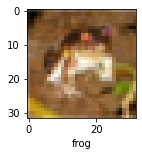

In [10]:
plot_sample(X_train, y_train, 0)

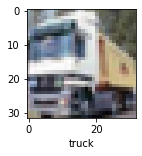

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# <h4 style="color:purple"> Partie hethi preprocessing Build simple artificial neural network for image classification</h4>


In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 92s 58ms/step - loss: 1.8139 - accuracy: 0.3576
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6235 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5422 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4811 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4331 - accuracy: 0.4987


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.68      0.54      1000
           1       0.58      0.61      0.60      1000
           2       0.52      0.06      0.11      1000
           3       0.39      0.27      0.32      1000
           4       0.41      0.36      0.38      1000
           5       0.55      0.17      0.26      1000
           6       0.50      0.60      0.55      1000
           7       0.32      0.77      0.46      1000
           8       0.65      0.59      0.62      1000
           9       0.55      0.54      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.44     10000
weighted avg       0.49      0.47      0.44     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4476 - accuracy: 0.4814
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1017 - accuracy: 0.6149
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9781 - accuracy: 0.6601
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8906 - accuracy: 0.6917
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8153 - accuracy: 0.7187
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7555 - accuracy: 0.7364
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6960 - accuracy: 0.7585
Epoch 8/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6551 - accuracy: 0.7727
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6114 - accuracy: 0.7847
Epoch 10/10
1563/1563 [==============================] - 56s 36m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9330 - accuracy: 0.6962


[0.9330126047134399, 0.6962000131607056]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.21656423e-02, 6.86510248e-05, 8.05791526e-04, 4.21672046e-01,
        8.51911784e-04, 4.93509956e-02, 1.36798136e-02, 1.09872967e-03,
        4.87753451e-01, 1.25529524e-02],
       [3.21368761e-02, 1.02668963e-02, 1.58144985e-06, 8.65297864e-07,
        3.03102115e-06, 2.52470436e-08, 1.34881715e-08, 9.81723924e-10,
        9.57345545e-01, 2.45126925e-04],
       [1.40875101e-01, 1.94743842e-01, 5.40526002e-04, 3.64402146e-03,
        1.50485139e-03, 5.11308992e-03, 4.85614548e-03, 5.66830626e-04,
        5.89321554e-01, 5.88341057e-02],
       [7.05418348e-01, 8.53602600e-04, 1.60542503e-03, 1.91524217e-03,
        8.35665874e-03, 2.72630219e-04, 1.82750896e-02, 7.54593711e-05,
        2.62149453e-01, 1.07798353e-03],
       [1.14554621e-06, 7.95012693e-06, 1.12387817e-02, 3.60011607e-02,
        1.31779492e-01, 3.20741441e-03, 8.17737818e-01, 3.65958755e-07,
        2.53566486e-05, 4.49271511e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

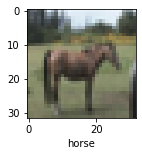

In [22]:
plot_sample(X_test, y_test,9999)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[10]]

'airplane'